# Indeed Crawling & Visualization

In [334]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm

from collections import defaultdict 
import nltk  
from nltk.corpus import stopwords
StopWords = set(stopwords.words('english'))
import string

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from dateutil.parser import parse

### Get urls

In [169]:
# get all urls of reviews
num_page = 88
review_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews'
        review_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?start=' + str(20*(i-1))
        review_urls.append(u)

In [170]:
# get urls of work-life balance reviews
num_page = 27
wlb_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=wlbalance'
        wlb_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=wlbalance&start=' + str(20*(i-1))
        wlb_urls.append(u)

In [171]:
# get urls of pay & benefits reviews
num_page = 21
pb_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=paybenefits'
        pb_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=paybenefits&start=' + str(20*(i-1))
        pb_urls.append(u)

In [172]:
# get urls of job security & advancement reviews
num_page = 33
adv_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=jobsecadv'
        adv_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=jobsecadv&start=' + str(20*(i-1))
        adv_urls.append(u)

In [173]:
# get urls of management reviews
num_page = 21
mgmt_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=mgmt'
        mgmt_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=mgmt&start=' + str(20*(i-1))
        mgmt_urls.append(u)

In [174]:
# get urls of culture reviews
num_page = 28
cul_urls = []

for i in range(1, num_page+1):
    if i == 1:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=culture'
        cul_urls.append(u)
    else:
        u = 'https://www.indeed.com/cmp/Google/reviews?ftopic=culture&start=' + str(20*(i-1))
        cul_urls.append(u)

### Get reviews

#### Get overall reviews

In [3]:
# get overall reviews
reviewsDF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorJobTitle', 'authorLocation', 'mainText', 'pros', 'cons'])

In [6]:
for u in tqdm(review_urls):
    p = requests.get(u)
    soup = bs(p.content)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['authorJobTitle'] = i.find('span', 'cmp-reviewer-job-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        data['mainText'] = i.find('span', 'cmp-review-text').text
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        reviewsDF.loc[len(reviewsDF)] = data

In [7]:
## remove rows with duplicated reviewIDs
reviewsDF = reviewsDF.drop_duplicates('reviewID')

In [8]:
reviewsDF[['authorJobTitle', 'status']] = reviewsDF['authorJobTitle'].str.rsplit('(', n=1, expand=True)

In [82]:
reviewsDF

,title,reviewID,date,rating,authorJobTitle,authorLocation,mainText,pros,cons,status
0,Very Good,0e886d5b09b057d9,"July 17, 2015",5.0,Adds Quality Rator,"San Diego, CA","A very good company to work for, i was a subco...",None,None,Former Employee) –
1,What's there to say?,13a180e30beaa4ae,"March 5, 2019",4.0,Senior Staff Interaction Designer,"Mountain View, CA",I learned that a job does not define a person....,None,None,Former Employee) –
2,n/a,d1f9ed4a1f578add,"March 5, 2019",3.0,Technical Recruiter,"Austin, TX",Job Work/Life Balance : Definitely feel I had ...,None,None,Current Employee) –
3,I enjoyed it,8c8c861e5ff1fa8a,"March 5, 2019",5.0,Line Technician,"Fairburn, GA",I enjoyed it for the most part met some amazin...,Great money,Poor management,Former Employee) –
4,Loved Google,67c04ba2992650db,"March 4, 2019",5.0,Active Channels Specialist,"Austin, TX",Loved everything about working at Google. Hand...,None,None,Current Employee) –
5,Great,1c2f5290f3d5bd31,"March 4, 2019",5.0,Support,"Mountain View, CA",The best place Ive ever worked. Encouraging th...,None,None,Former Employee) –
6,Contracter position,ca47fc9dea3b57d4,"March 2, 2019",5.0,Store Operator,"Boston, MA",I did not directly work for Google and I was n...,None,None,Former Employee) –
7,Not what I hoped for,f514fee73e76ba4b,"March 1, 2019",3.0,Digital Consultant,"Ann Arbor, MI",I was young when I was brought on to the digit...,Free lunch and private work rooms,Ignorance Arrogance and Lack of Self-Creativity,Former Employee) –
8,Local Guide,05230a782ed335a5,"February 27, 2019",4.0,Expert Photographer,Usa,This is a volunteer program in the Google Maps...,Growing experience,No pay or advancement to corporate position,Current Employee) –
9,Great company with a great culture,1e0dffa60738d4cc,"February 25, 2019",5.0,Channels Specialist,"Austin, TX",I thoroughly enjoy working at Google. No two ...,"Free breakfast, lunch, laptop, work supplies, ...",Contract work,Current Employee) –


In [93]:
## separate the former employees and current employees
reviewsDF_former = reviewsDF[reviewsDF['status'] == 'Former Employee) – \xa0']
reviewsDF_current = reviewsDF[reviewsDF['status'] == 'Current Employee) – \xa0']

#### Get work-life balance reviews

In [211]:
wlb_DF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorLocation', 'highlight', 'pros', 'cons'])
browser = webdriver.Chrome(executable_path='./chromedriver')
for u in wlb_urls:
    browser.get(u)
    p = browser.execute_script("return document.body.innerHTML")
    soup = bs(p)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        try:
            data['highlight'] = i.find('span', 'cmp-highlight').text
        except:
            data['highlight'] = None  
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        wlb_DF.loc[len(wlb_DF)] = data
browser.close()

In [212]:
wlb_DF = wlb_DF.drop_duplicates('reviewID')

#### Get pay & benefits reviews

In [214]:
pb_DF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorLocation', 'highlight', 'pros', 'cons'])
browser = webdriver.Chrome(executable_path='./chromedriver')
for u in pb_urls:
    browser.get(u)
    p = browser.execute_script("return document.body.innerHTML")
    soup = bs(p)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        try:
            data['highlight'] = i.find('span', 'cmp-highlight').text
        except:
            data['highlight'] = None
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        pb_DF.loc[len(pb_DF)] = data
browser.close()

In [215]:
pb_DF = pb_DF.drop_duplicates('reviewID')

#### Get job security & advancement reviews

In [217]:
adv_DF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorLocation', 'highlight', 'pros', 'cons'])
browser = webdriver.Chrome(executable_path='./chromedriver')
for u in adv_urls:
    browser.get(u)
    p = browser.execute_script("return document.body.innerHTML")
    soup = bs(p)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        try:
            data['highlight'] = i.find('span', 'cmp-highlight').text
        except:
            data['highlight'] = None
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        adv_DF.loc[len(adv_DF)] = data
browser.close()

In [218]:
adv_DF = adv_DF.drop_duplicates('reviewID')

#### Get management reviews

In [220]:
mgmt_DF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorLocation', 'highlight', 'pros', 'cons'])
browser = webdriver.Chrome(executable_path='./chromedriver')
for u in mgmt_urls:
    browser.get(u)
    p = browser.execute_script("return document.body.innerHTML")
    soup = bs(p)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        try:
            data['highlight'] = i.find('span', 'cmp-highlight').text
        except:
            data['highlight'] = None 
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        mgmt_DF.loc[len(mgmt_DF)] = data
browser.close()

In [221]:
mgmt_DF = mgmt_DF.drop_duplicates('reviewID')

#### Get culture reviews

In [222]:
cul_DF = pd.DataFrame(columns=['title', 'reviewID', 'date', 'rating', 'authorLocation', 'highlight', 'pros', 'cons'])
browser = webdriver.Chrome(executable_path='./chromedriver')
for u in cul_urls:
    browser.get(u)
    p = browser.execute_script("return document.body.innerHTML")
    soup = bs(p)
    data = {}
    for i in soup.find_all('div', class_ = 'cmp-review'):
        data['rating'] = i.find('div', 'cmp-ratingNumber').string
        data['title'] = i.find('div', 'cmp-review-title').text
        data['reviewID'] = i['data-tn-entityid']
        data['authorLocation'] = i.find('span', 'cmp-reviewer-job-location').text
        data['date'] = i.find('span', 'cmp-review-date-created').text
        try:
            data['highlight'] = i.find('span', 'cmp-highlight').text
        except:
            data['highlight'] = None 
        try:
            data['pros'] = i.find('div', 'cmp-review-pro-text').text
        except:
            data['pros'] = None
        try:       
            data['cons'] = i.find('div', 'cmp-review-con-text').text
        except:
            data['cons'] = None
        cul_DF.loc[len(cul_DF)] = data
browser.close()

In [223]:
cul_DF = cul_DF.drop_duplicates('reviewID')

In [55]:
#Merge the data
#reviewsDF = reviewsDF.merge(wlb_DF.loc[:,['reviewID', 'highlight']], on = 'reviewID', how = 'left')

### Visualization - WordCloud

#### reviewsDF - former employees - cons

In [114]:
punctuation = set(string.punctuation)
wordCount = defaultdict(int)

for index, d in reviewsDF_former[reviewsDF_former['cons']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords:
            wordCount[w] += 1  

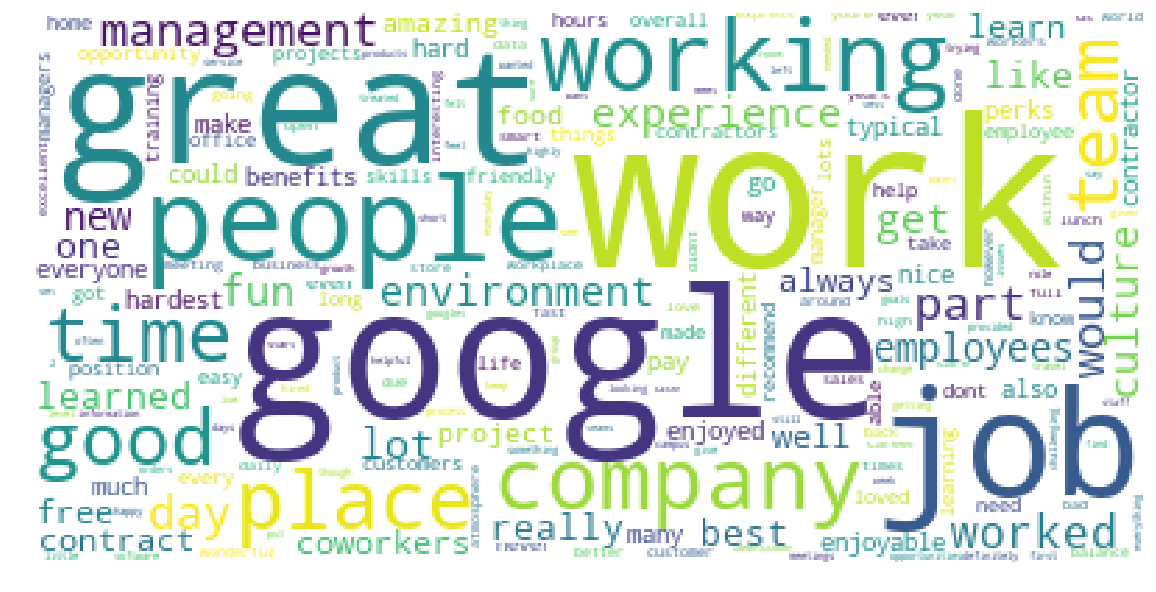

In [115]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
wordCount = defaultdict(int)
for index, d in reviewsDF_former[reviewsDF_former['pros']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            wordCount[w] += 4  

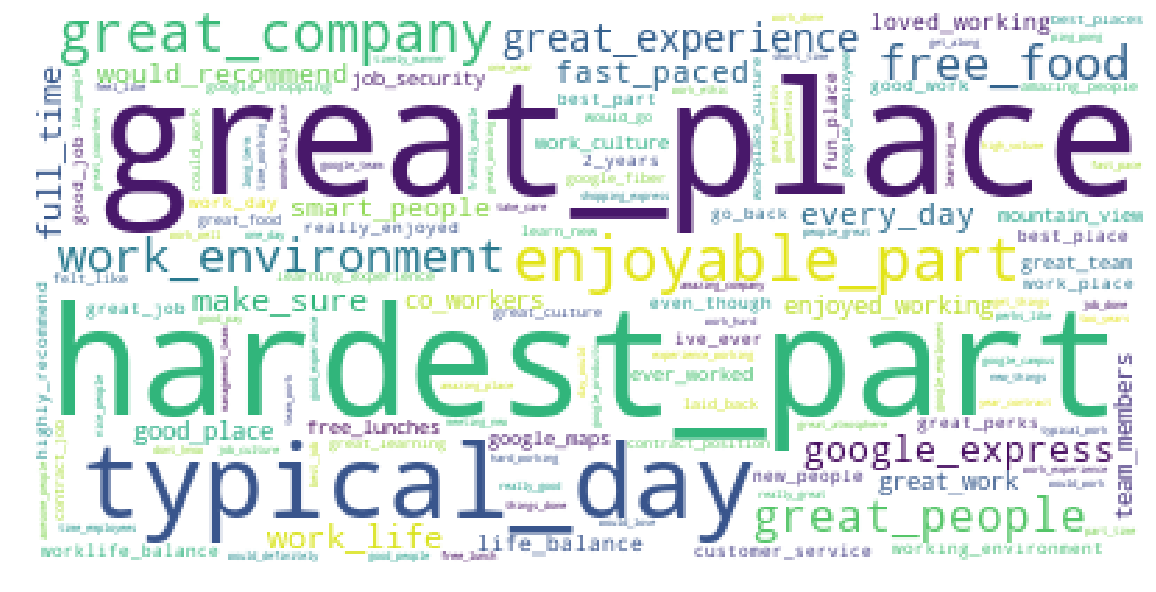

In [129]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [132]:
wordCount = defaultdict(int)
for index, d in reviewsDF_former[reviewsDF_former['cons']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            wordCount[w] += 9  

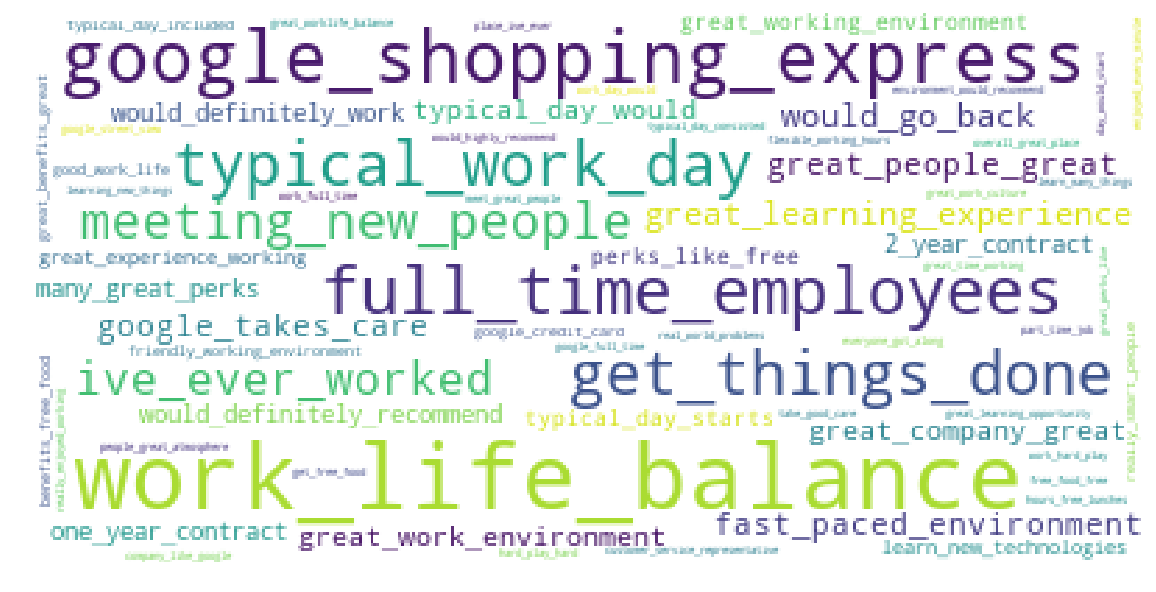

In [133]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### reviewsDF - current employees - pros

In [163]:
punctuation = set(string.punctuation)
wordCount = defaultdict(int)

for index, d in reviewsDF_current[reviewsDF_current['pros']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords:
            wordCount[w] += 1  

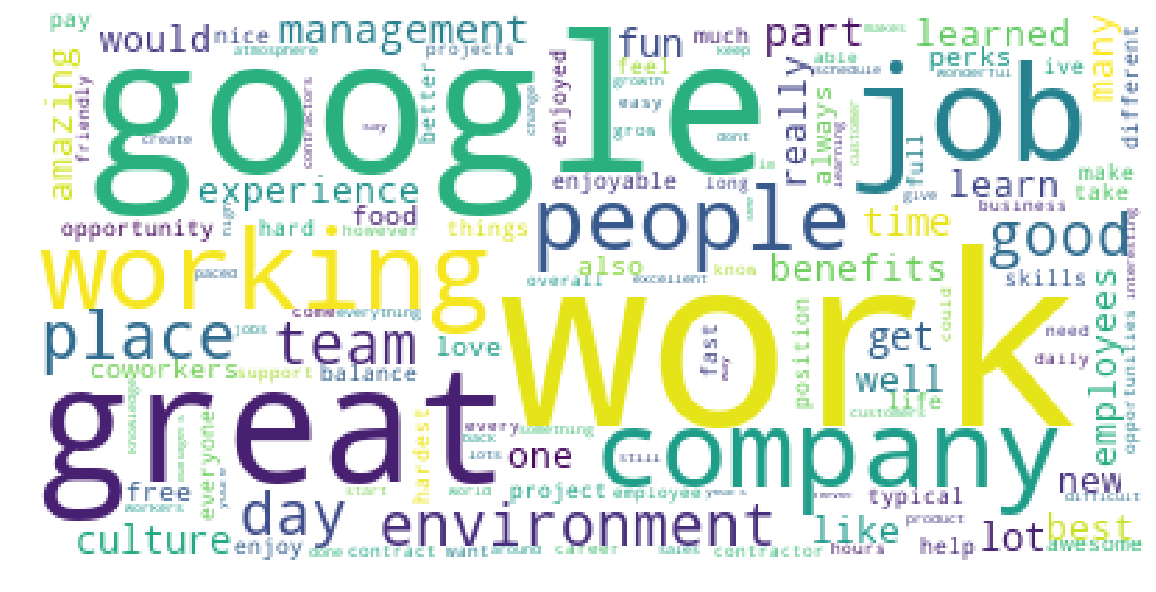

In [158]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [164]:
#wordCount = defaultdict(int)
for index, d in reviewsDF_current[reviewsDF_current['pros']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            wordCount[w] += 4  

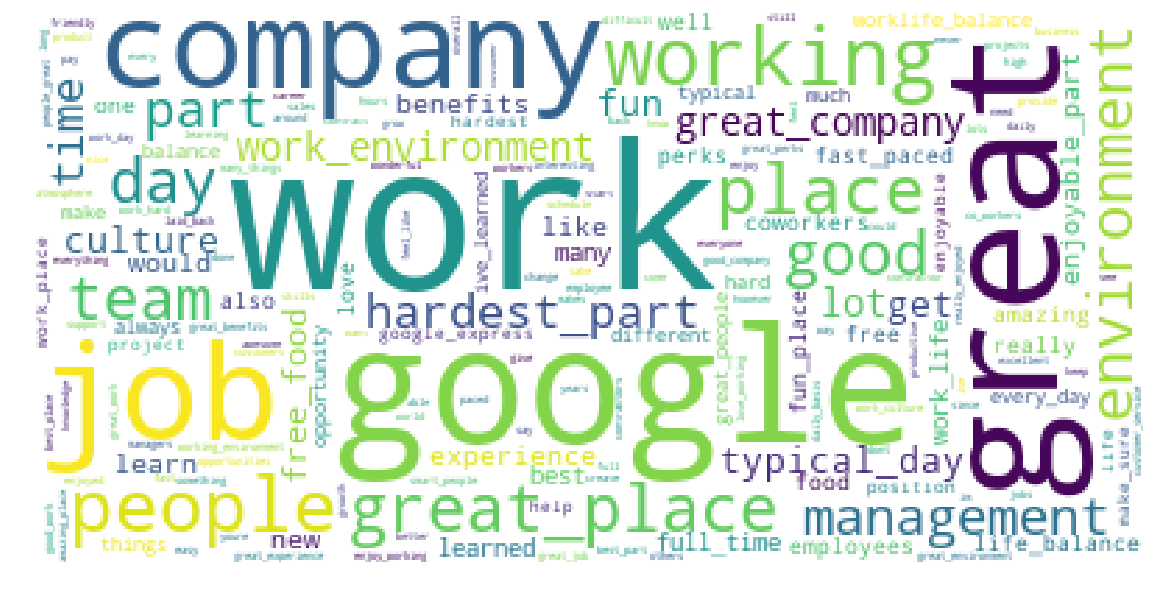

In [160]:
#wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [165]:
#wordCount = defaultdict(int)
for index, d in reviewsDF_current[reviewsDF_current['pros']!= 'None'].iterrows():
    r = ''.join([c for c in d['mainText'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            wordCount[w] += 9  

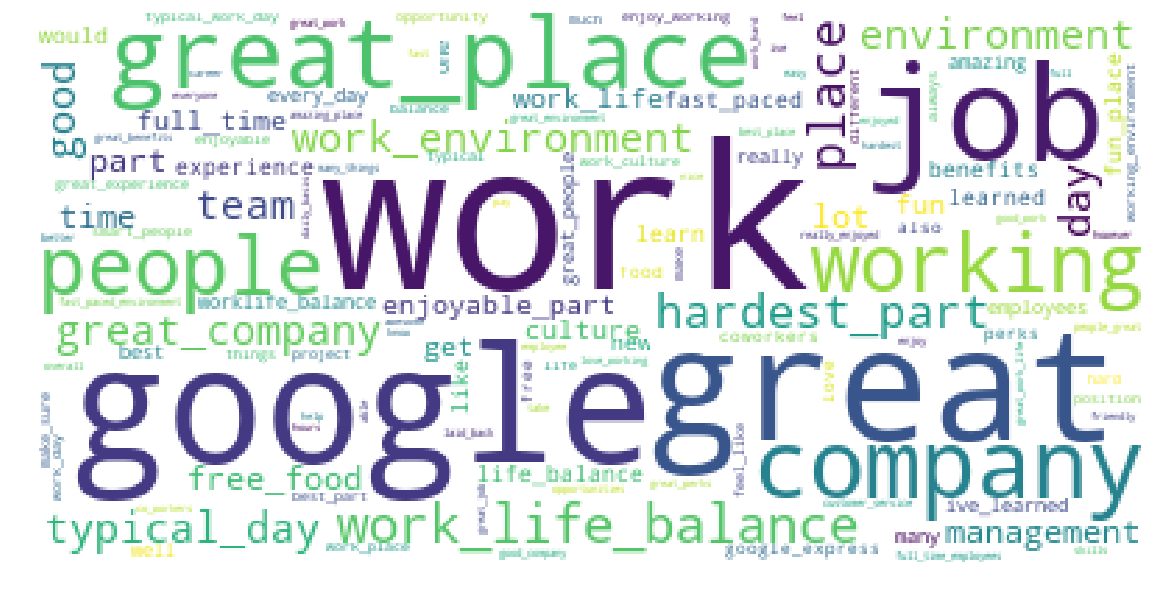

In [166]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### work-life balance

In [247]:
wordCount = defaultdict(int)

for index, d in wlb_DF[~wlb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords and not w in ['work', 'balance', 'worklife']:
            wordCount[w] += 1  

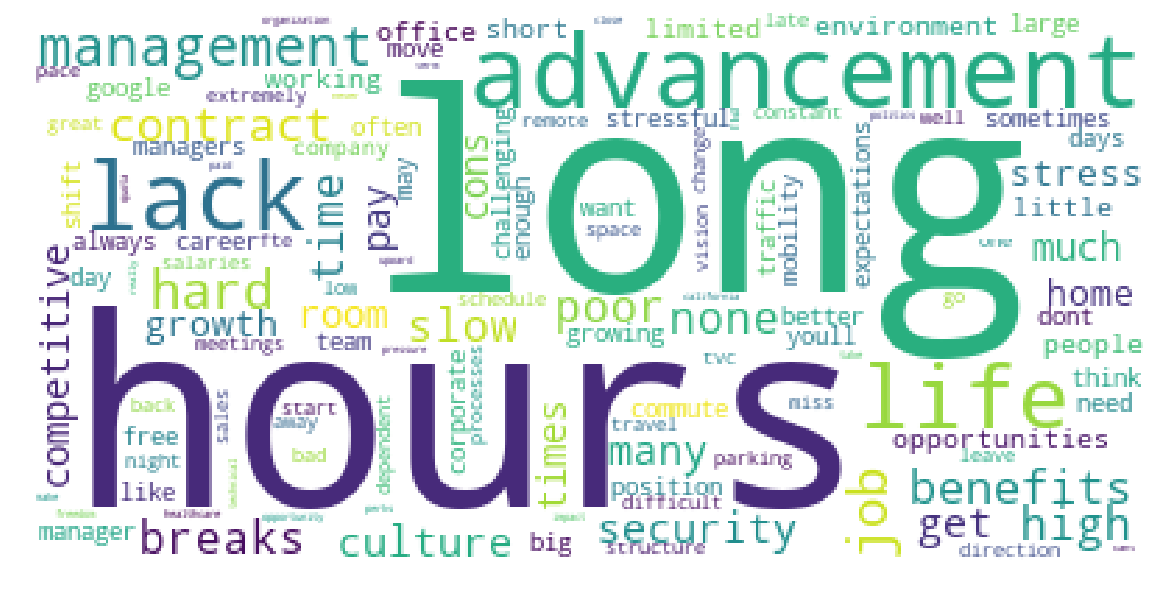

In [248]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [253]:
wordCount = defaultdict(int)
for index, d in wlb_DF[~wlb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            if not w in ["work_life", "life_balance", "worklife_balance"]:
                wordCount[w] += 4  

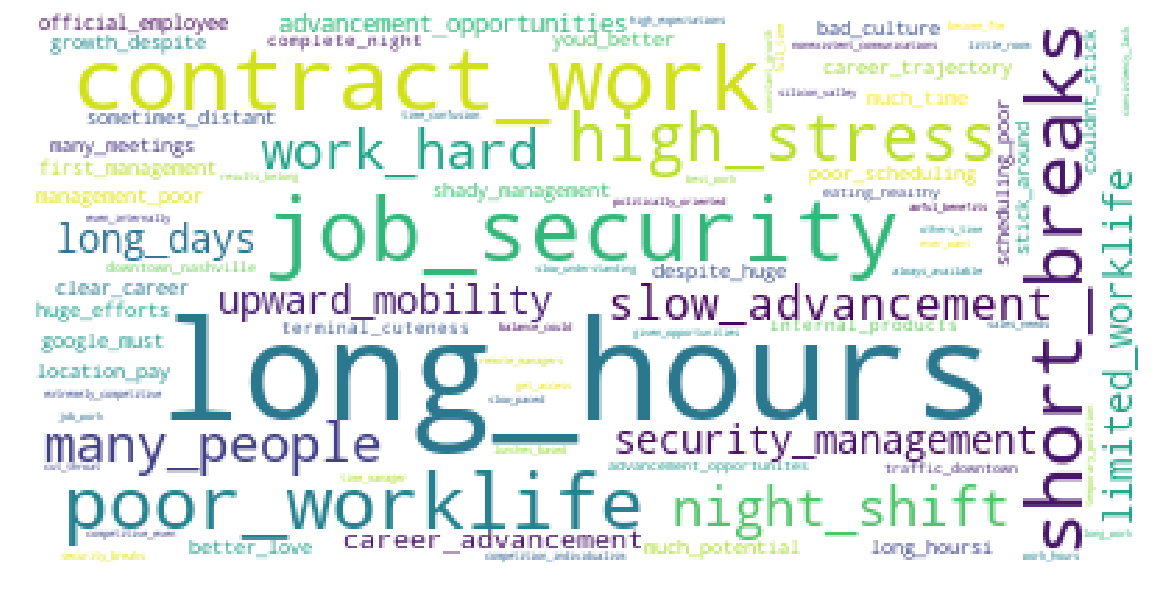

In [254]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [255]:
#wordCount = defaultdict(int)
for index, d in  wlb_DF[~wlb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            if w != "work_life_balance":
                wordCount[w] += 8  

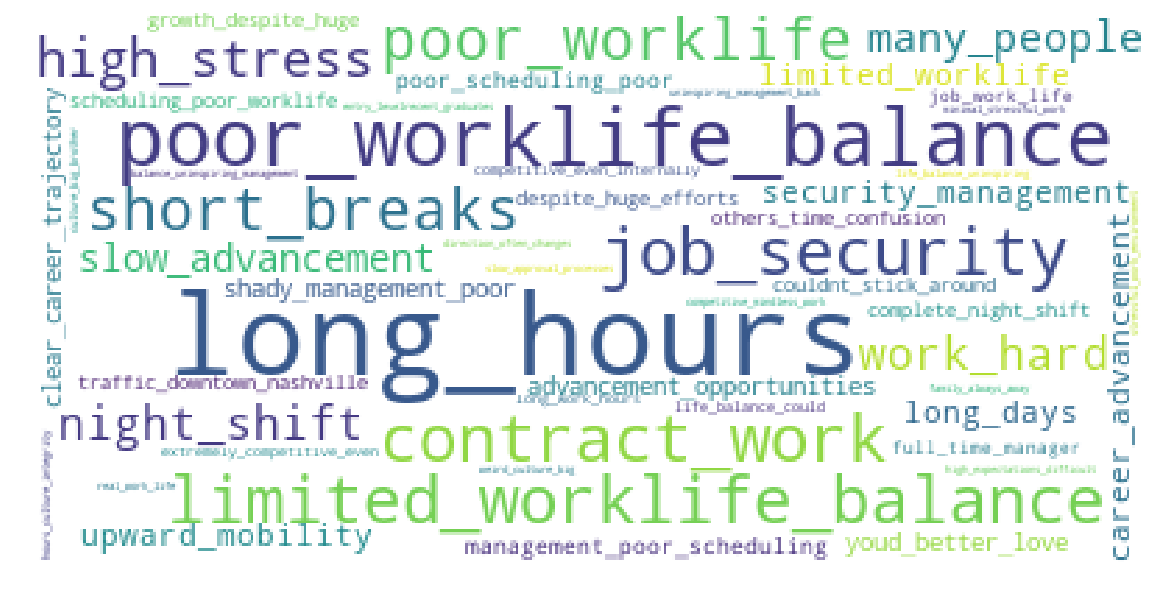

In [256]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### pay & benefits

In [277]:
wordCount = defaultdict(int)

for index, d in pb_DF[~pb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords:
            wordCount[w] += 1  

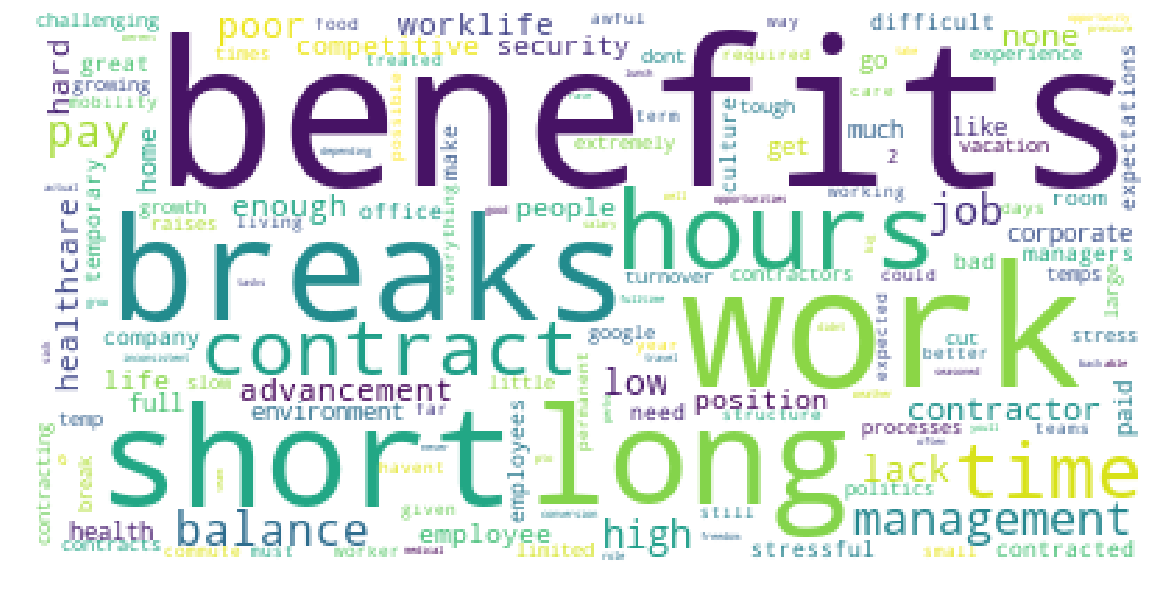

In [278]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [279]:
#wordCount = defaultdict(int)
for index, d in pb_DF[~pb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            if not w in ['work_life', 'life_balance', 'worklife_balance']:
                wordCount[w] += 4  

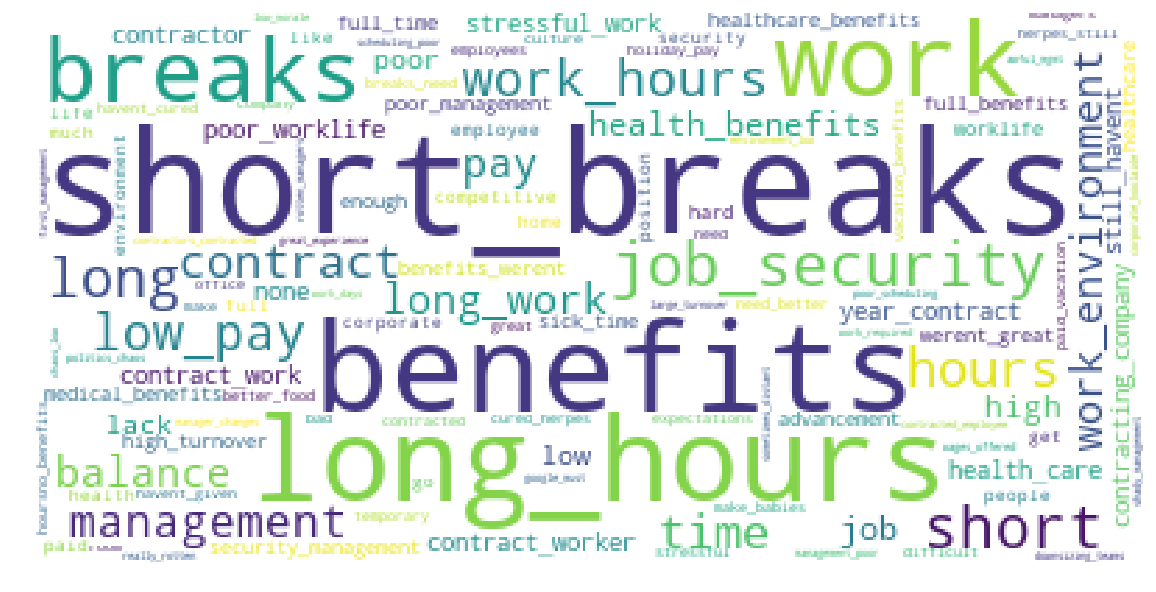

In [280]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [283]:
wordCount = defaultdict(int)
for index, d in  pb_DF[~pb_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            if w != "work_life_balance":
                wordCount[w] += 8  

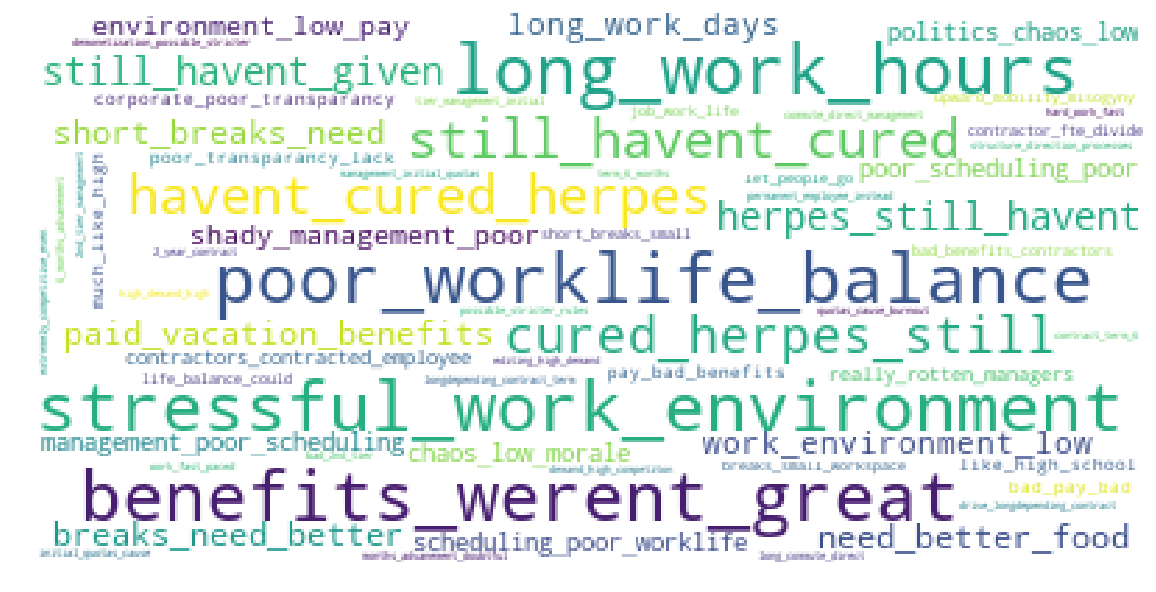

In [284]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### job security & advancement

In [298]:
wordCount = defaultdict(int)

for index, d in adv_DF[~adv_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords and not w in ['job', 'work']:
            wordCount[w] += 1  

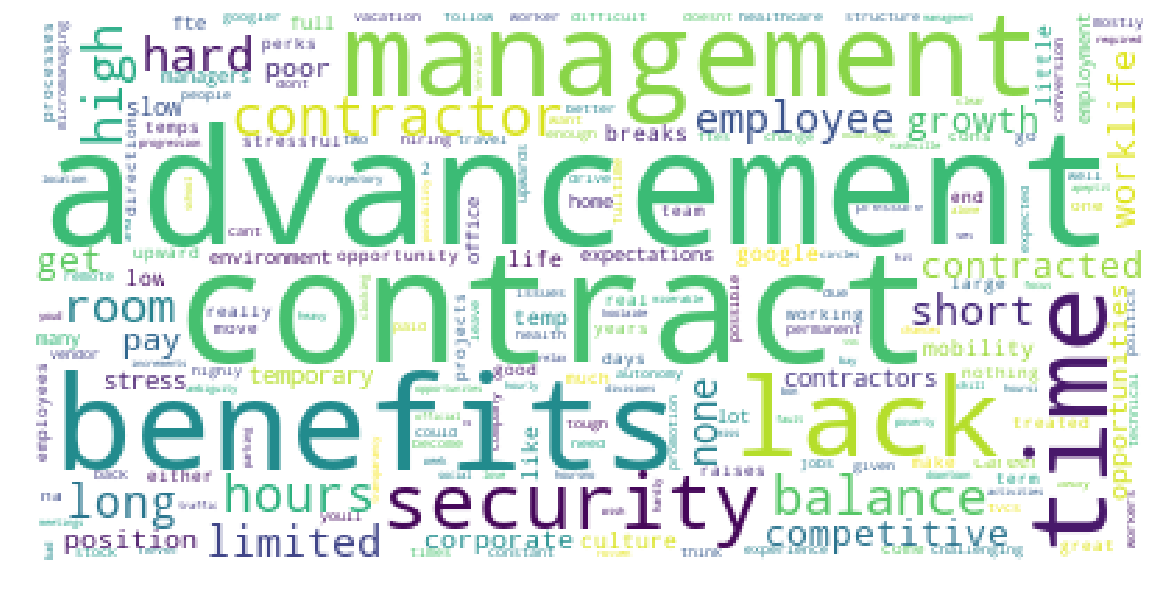

In [299]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [304]:
wordCount = defaultdict(int)
for index, d in adv_DF[~adv_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            if not w in ['job_security', 'worklife_balance', 'life_balance', 'work_life']:
                wordCount[w] += 4  

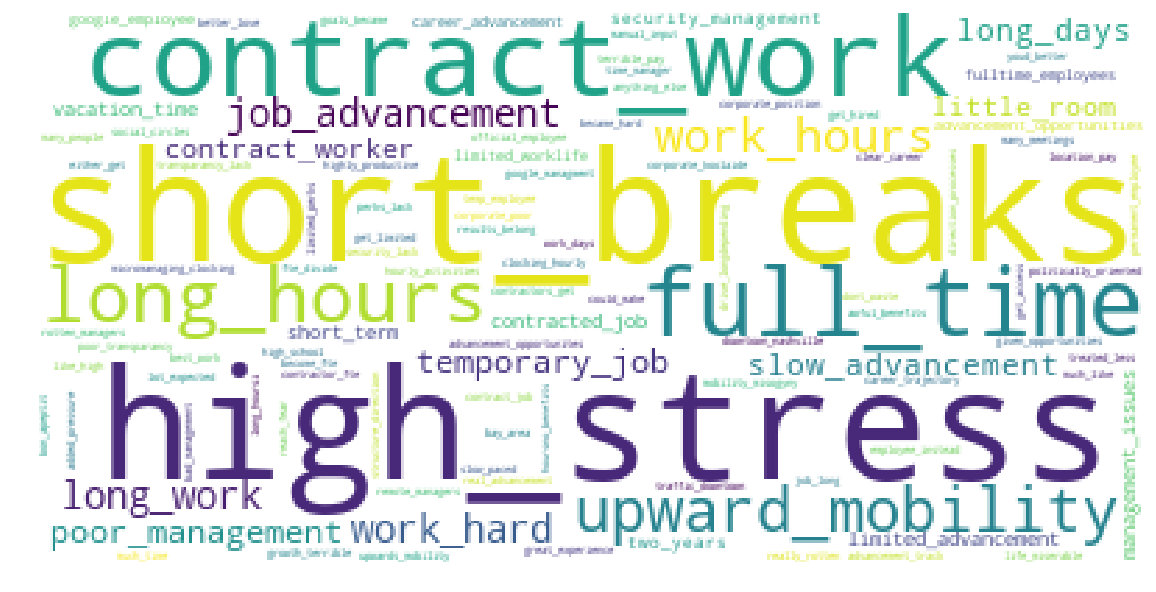

In [305]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [306]:
#wordCount = defaultdict(int)
for index, d in  adv_DF[~adv_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            if w != 'work_life_balance':
                wordCount[w] += 8  

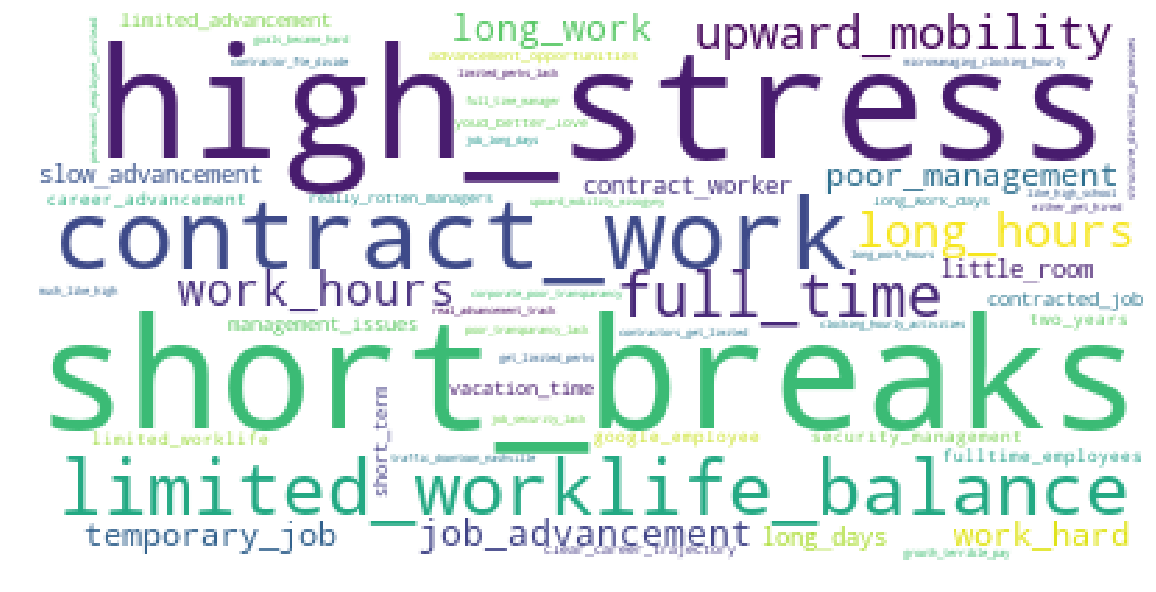

In [307]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### management

In [312]:
wordCount = defaultdict(int)

for index, d in mgmt_DF[~mgmt_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords:
            wordCount[w] += 1  

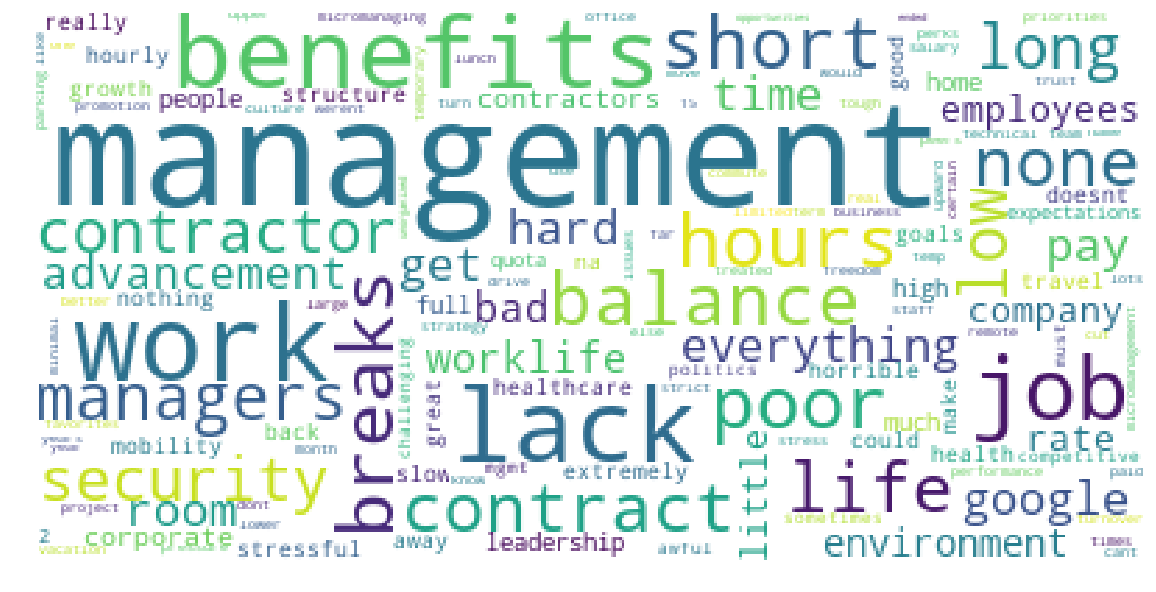

In [313]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [314]:
wordCount = defaultdict(int)
for index, d in mgmt_DF[~mgmt_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            if not w in ['job_security', 'worklife_balance', 'life_balance', 'work_life']:
                wordCount[w] += 4  

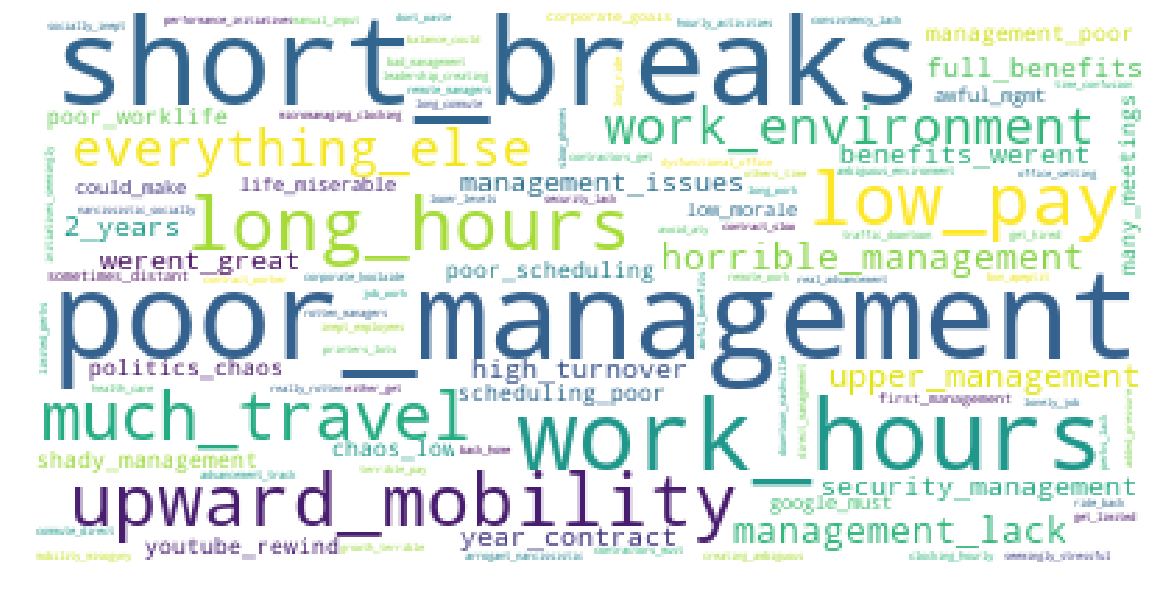

In [315]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [316]:
#wordCount = defaultdict(int)
for index, d in mgmt_DF[~mgmt_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            if w != 'work_life_balance':
                wordCount[w] += 8  

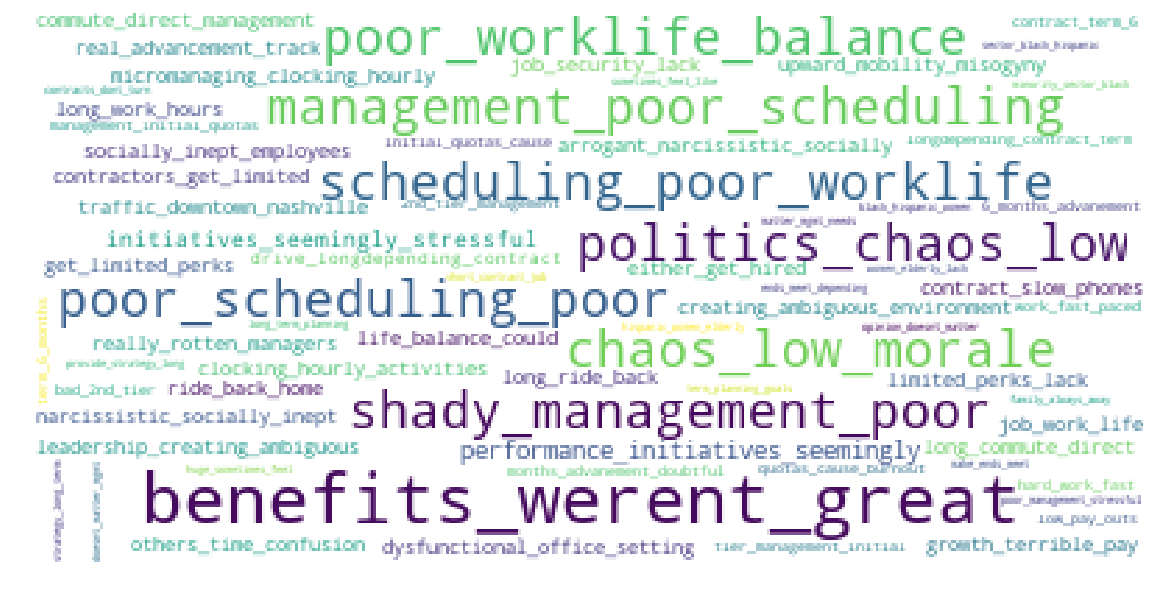

In [317]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### culture

In [324]:
wordCount = defaultdict(int)

for index, d in cul_DF[~cul_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in r.split():
        if not w in StopWords and not w in ['none']:
            wordCount[w] += 1  

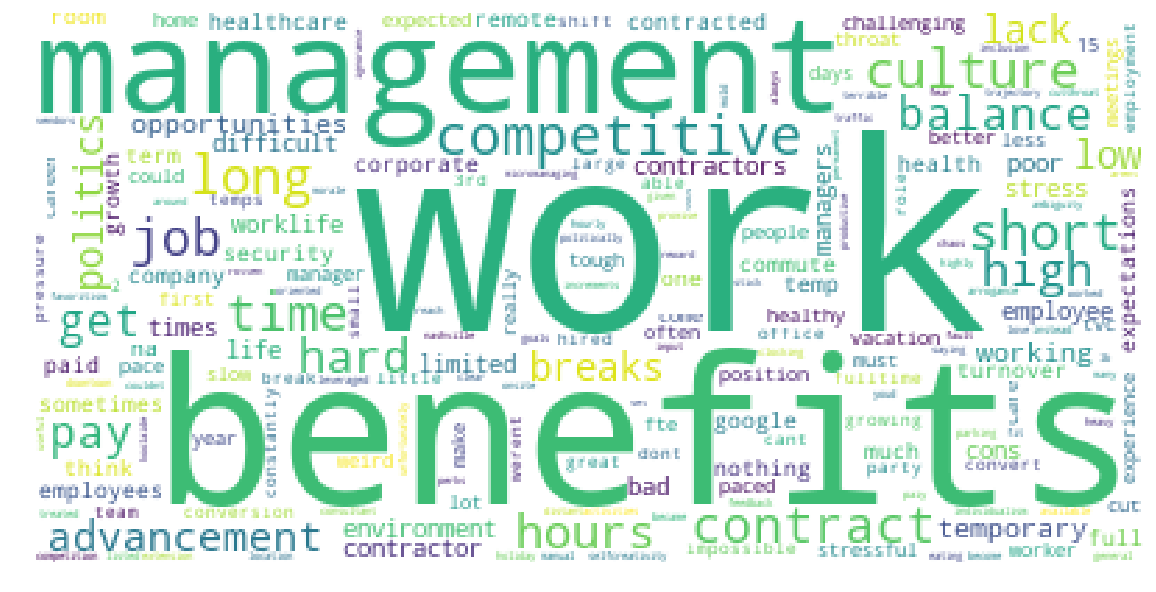

In [325]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [326]:
#wordCount = defaultdict(int)
for index, d in cul_DF[~cul_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.bigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords:
            w = "_".join(w)
            if not w in ['job_security', 'worklife_balance', 'life_balance', 'work_life']:
                wordCount[w] += 4  

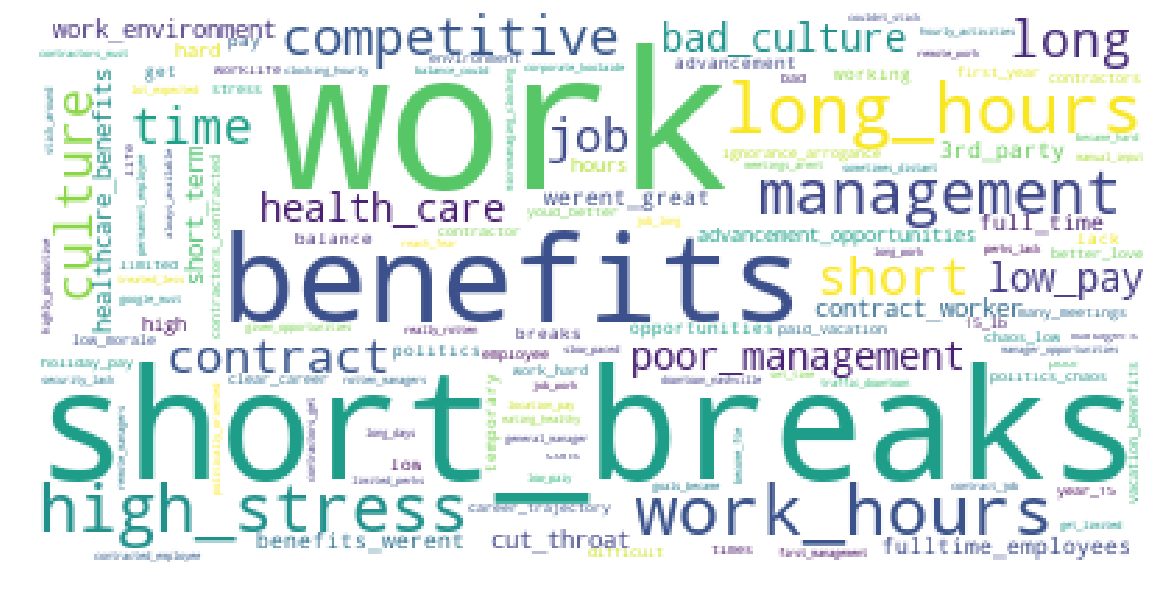

In [327]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [328]:
#wordCount = defaultdict(int)
for index, d in cul_DF[~cul_DF['cons'].isna()].iterrows():
    r = ''.join([c for c in d['cons'].lower() if not c in punctuation])
    for w in nltk.trigrams(nltk.word_tokenize(r)):
        if not w[0] in StopWords and not w[1] in StopWords and not w[2] in StopWords:
            w = "_".join(w)
            if w != 'work_life_balance':
                wordCount[w] += 8  

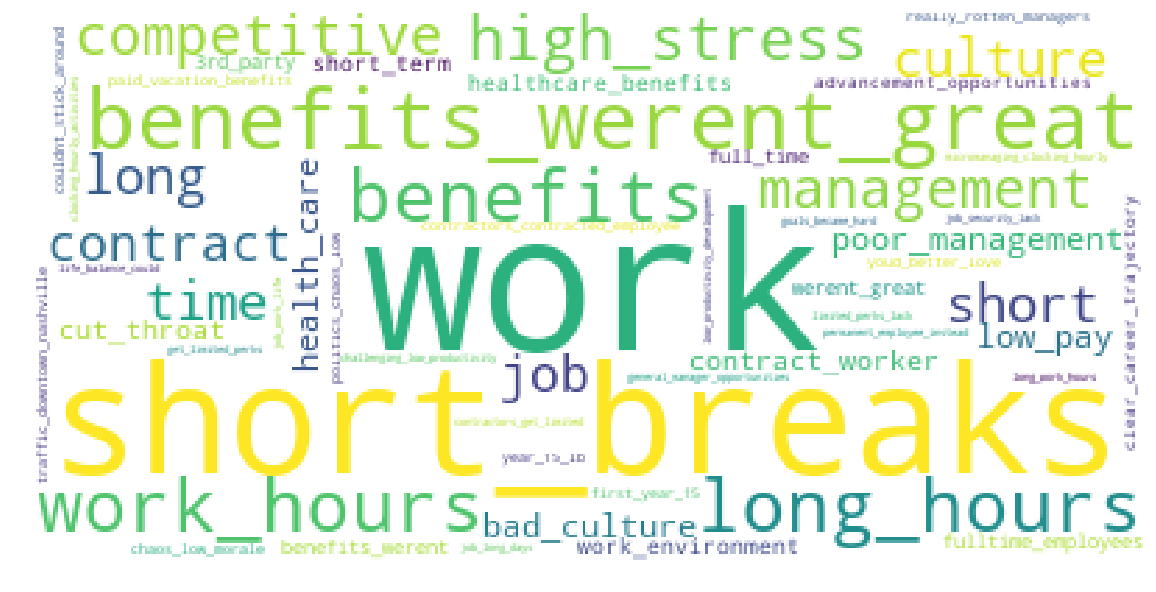

In [329]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Review ratings over time

In [338]:
dt = parse(reviewsDF['date'][0])
print(dt)
print(dt.strftime('%d/%m/%Y'))

2015-07-17 00:00:00
17/07/2015


In [342]:
Date = []
for i in reviewsDF['date']:
    dt = parse(i)
    Date.append(dt.strftime('%d/%m/%Y'))
reviewsDF['date'] = Date

In [343]:
reviewsDF

,title,reviewID,date,rating,authorJobTitle,authorLocation,mainText,pros,cons,status
0,Very Good,0e886d5b09b057d9,17/07/2015,5.0,Adds Quality Rator,"San Diego, CA","A very good company to work for, i was a subco...",None,None,Former Employee) –
1,What's there to say?,13a180e30beaa4ae,05/03/2019,4.0,Senior Staff Interaction Designer,"Mountain View, CA",I learned that a job does not define a person....,None,None,Former Employee) –
2,n/a,d1f9ed4a1f578add,05/03/2019,3.0,Technical Recruiter,"Austin, TX",Job Work/Life Balance : Definitely feel I had ...,None,None,Current Employee) –
3,I enjoyed it,8c8c861e5ff1fa8a,05/03/2019,5.0,Line Technician,"Fairburn, GA",I enjoyed it for the most part met some amazin...,Great money,Poor management,Former Employee) –
4,Loved Google,67c04ba2992650db,04/03/2019,5.0,Active Channels Specialist,"Austin, TX",Loved everything about working at Google. Hand...,None,None,Current Employee) –
5,Great,1c2f5290f3d5bd31,04/03/2019,5.0,Support,"Mountain View, CA",The best place Ive ever worked. Encouraging th...,None,None,Former Employee) –
6,Contracter position,ca47fc9dea3b57d4,02/03/2019,5.0,Store Operator,"Boston, MA",I did not directly work for Google and I was n...,None,None,Former Employee) –
7,Not what I hoped for,f514fee73e76ba4b,01/03/2019,3.0,Digital Consultant,"Ann Arbor, MI",I was young when I was brought on to the digit...,Free lunch and private work rooms,Ignorance Arrogance and Lack of Self-Creativity,Former Employee) –
8,Local Guide,05230a782ed335a5,27/02/2019,4.0,Expert Photographer,Usa,This is a volunteer program in the Google Maps...,Growing experience,No pay or advancement to corporate position,Current Employee) –
9,Great company with a great culture,1e0dffa60738d4cc,25/02/2019,5.0,Channels Specialist,"Austin, TX",I thoroughly enjoy working at Google. No two ...,"Free breakfast, lunch, laptop, work supplies, ...",Contract work,Current Employee) –
